# <font color="blue">Question 1: </font>
## <font color="sky blue">Use Digit dataset and perform the Logistic Regression. Import the dataset from Sklearn</font>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import datasets, ensemble, metrics, dummy
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
n_neighbors = 15
# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

In [3]:
print("Feature Names:",iris.feature_names)
print("Target ouput predictions: ",)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target ouput predictions: 


In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))
final_score=metrics.accuracy_score(y_test,y_pred)
print("KNN Accuracy=",final_score)
logReg= LogisticRegression()
logReg.fit(X_train,y_train)
predictions = logReg.predict(X_test)
log_score = logReg.score(X_test, y_test)
print("Logistic Regression Accuracy=",log_score)

KNN Accuracy= 0.9333333333333333
Logistic Regression Accuracy= 0.8333333333333334


Text(0, 0.5, 'Testing Accuracy')

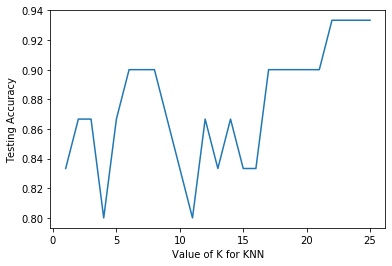

In [5]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(iris.data, iris.target)

full_set=np.append(iris.data,iris.target.reshape(150,1),axis=1)
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[3,4,5,2],[5,4,2,3],[7,5,6,2],[5,3,1,0],[7,3,5,1]]
y_predict = knn.predict(x_new)
for i in range(len(x_new)):
    print(x_new[i],classes[y_predict[i]])

[3, 4, 5, 2] versicolor
[5, 4, 2, 3] setosa
[7, 5, 6, 2] virginica
[5, 3, 1, 0] setosa
[7, 3, 5, 1] versicolor


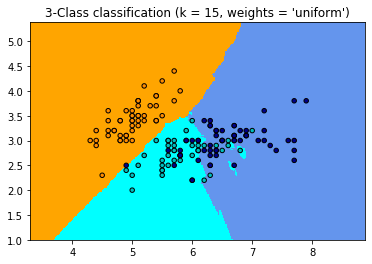

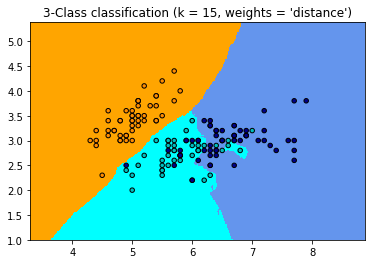

In [7]:
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X,y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()